In [1]:
from my_functions import*

In [2]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

In [3]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Select range of events
nmin1=100
nmax1=4000

#Select quality 0 Z->mumu
Zmumu_pt=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin1:nmax1]
Zmumu_eta=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin1:nmax1]
Zmumu_phi=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin1:nmax1]
#And select the Z peak pairs
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)
#Select the ZeroBias data with energy cut

nmin2=100
nmax2=50000
ZeroBias_eta=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin2:nmax2]
ZeroBias_phi=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin2:nmax2]
ZeroBias_pt=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin2:nmax2]

100%|██████████| 3900/3900 [00:04<00:00, 938.92it/s]


In [4]:
print(Zmumu_pt)
print(MuonTree_Zmumu["muon_pt"].array()[100:1200])

[[6.39e+04, 2.61e+04], [], [], ..., [2.81e+04, 2.36e+04], [4.82e+04, 4.05e+04]]
[[6.39e+04, 2.61e+04, 1.82e+04], [4.81e+04, ...], ..., [4.31e+04, 4.53e+04]]


In [5]:
ZeroBias_pt[ak.num(ZeroBias_pt) > 0]

<Array [[1.43e+04], [1.44e+04], ..., [2.31e+05]] type='2692 * var * float32'>

In [6]:
#Computo isolations
dr_min=0.09
dr_max=0.3
res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta, Zmumu_phi, dr_min, dr_max, event_range=[nmin1, nmax1], batch_size=int((nmax1-nmin1)/10))
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, [nmin2, nmax2], int((nmax2-nmin2)/10))

KeyboardInterrupt: 

In [8]:
len(res1)
len(Zmumu_pt)

3900

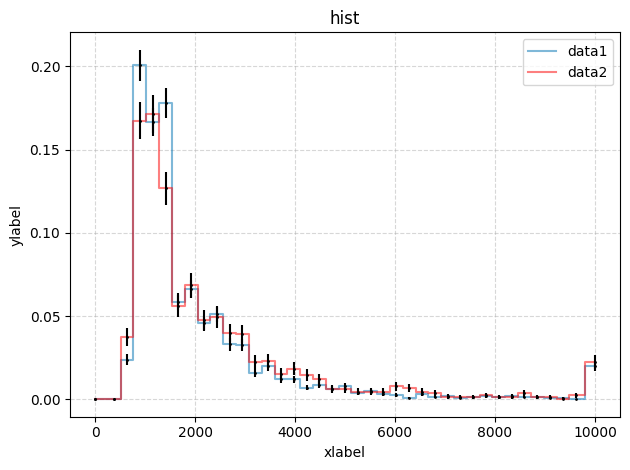

In [9]:
coolplot([res1, res2], np.linspace(0,10**4,40))

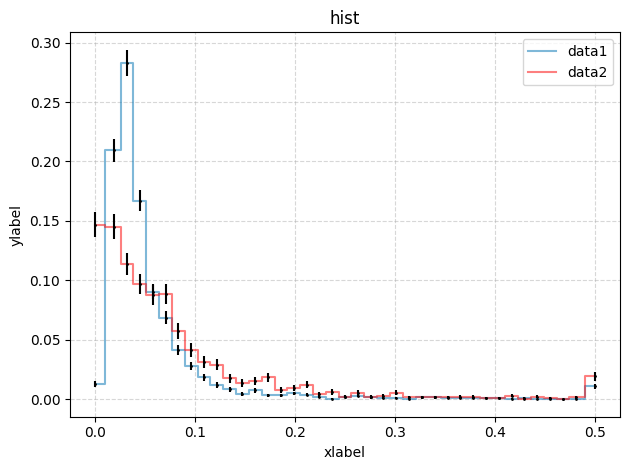

In [10]:
r1=ak.flatten(res1)/ak.flatten(Zmumu_pt)
r2=ak.flatten(res2)/ak.flatten(ZeroBias_pt)
coolplot([r1, r2], np.linspace(0,0.5,40))

In [11]:
r2[~np.isnan(r2)]

<Array [0.145, 0.0801, 0.078, ..., 0.0167, 0.0519] type='1302 * float64'>

In [16]:
bins=np.linspace(0,1,1000)

Zmumu_isolation = muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta, Zmumu_phi,
                                            dr_min, dr_max, [nmin1, nmax1], batch_size=1000)

Zmumu_data = ak.flatten(Zmumu_isolation)

#Compute ZeroBias isolation for a given dr_min and dr_max
ZeroBias_isolation = muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi,
                                                dr_min, dr_max, [nmin2, nmax2] ,batch_size=1000)

ZeroBias_data = ak.flatten(ZeroBias_isolation)

# Get the ratio of isolation to pt
Zmumu_ratio = Zmumu_data / ak.flatten(Zmumu_pt)
ZeroBias_ratio = ZeroBias_data / ak.flatten(ZeroBias_pt)

# Generate histogram counts (don't plot, just get the counts)
Zmumu_counts, _ = np.histogram(Zmumu_ratio, bins)
ZeroBias_counts, _ = np.histogram(ZeroBias_ratio, bins)

#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)

# Normalize to total events
TPR1 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR1 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

In [17]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Select range of events
nmin1=100
nmax1=4000

#Select quality 0 Z->mumu
Zmumu_pt=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin1:nmax1]
Zmumu_eta=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin1:nmax1]
Zmumu_phi=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin1:nmax1]
#And select the Z peak pairs
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)
#Select the ZeroBias data with energy cut

nmin2=100
nmax2=4000
ZeroBias_eta=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin2:nmax2]
ZeroBias_phi=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin2:nmax2]
ZeroBias_pt=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin2:nmax2]

100%|██████████| 3900/3900 [00:06<00:00, 566.31it/s]


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


In [18]:
bins=np.linspace(0,1,1000)

Zmumu_isolation = muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta, Zmumu_phi,
                                            dr_min, dr_max, [nmin1, nmax1], batch_size=1000)

Zmumu_data = ak.flatten(Zmumu_isolation)

#Compute ZeroBias isolation for a given dr_min and dr_max
ZeroBias_isolation = muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi,
                                                dr_min, dr_max, [nmin2, nmax2] ,batch_size=1000)

ZeroBias_data = ak.flatten(ZeroBias_isolation)

# Get the ratio of isolation to pt
Zmumu_ratio = Zmumu_data / ak.flatten(Zmumu_pt)
ZeroBias_ratio = ZeroBias_data / ak.flatten(ZeroBias_pt)

# Generate histogram counts (don't plot, just get the counts)
Zmumu_counts, _ = np.histogram(Zmumu_ratio, bins)
ZeroBias_counts, _ = np.histogram(ZeroBias_ratio, bins)

#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)

# Normalize to total events
TPR2 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR2 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

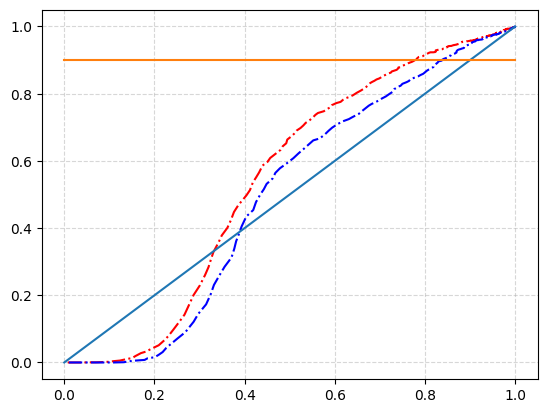

In [27]:
plt.plot(FPR1, TPR1, color='r', linestyle='-.')
plt.plot(FPR2, TPR2, color='b', linestyle='-.')
plt.plot([0, 1], [0, 1])
plt.plot([0, 1], [0.9, 0.9])
plt.grid(alpha=0.5, linestyle='--')